In [44]:
from IPython.core.display import display, HTML
import IPython

import os
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from datetime import date

%pylab inline
sns.set_palette('hls', 2)
sns.set_context("notebook")

# Folder to data/json files
data_foleder = 'data'
json_folder = 'topojson'
# csv/xls files
unemployement_eu = os.path.join(data_foleder, 'eurostat.csv')
unemployement_ch = os.path.join(data_foleder, 'unemployement_rate_ch.xlsx')
unemployement_sex_ch = os.path.join(data_foleder, 'unemployement_rate_sex_ch.xlsx')
unemployement_factor_ch = os.path.join(data_foleder, 'unemployement_rate_factor_ch.xlsx')
unemployement_nat_ch = os.path.join(data_foleder, 'unemployement_rate_nat_ch.xlsx')
unemployement_age_nat_ch = os.path.join(data_foleder, 'unemployement_rate_age_nat_ch.xlsx')
# topojson data
topojson_ch = os.path.join(json_folder, 'ch-cantons.topojson.json')
topojson_eu = os.path.join(json_folder, 'europe.topojson.json')

# Per-defiened data for plotting maps
eu_infos = {'lat_long': [54.5, 15.3], 'zoom': 3, 'key_on': 'NAME', 'topojson': 'objects.europe'}
ch_infos = {'lat_long': [46.8, 8.2], 'zoom': 8, 'key_on': 'name', 'topojson': 'objects.cantons'}

# For map previews
website = 'https://nbviewer.jupyter.org/'
github_repo = 'github/AdaTeamElec/ADA2017-Homeworks/blob/master/03%20-%20Interactive%20Viz/'

Populating the interactive namespace from numpy and matplotlib


# 0. Description 

## Background
In this homework we will be exploring interactive visualization, which is a key ingredient of many successful data visualizations (especially when it comes to infographics).

Unemployment rates are major economic metrics and a matter of concern for governments around the world. Though its definition may seem straightforward at first glance (usually defined as the number of unemployed people divided by the active population), it can be tricky to define consistently. For example, one must define what exactly unemployed means : looking for a job ? Having declared their unemployment ? Currently without a job ? Should students or recent graduates be included ? We could also wonder what the active population is : everyone in an age category (e.g. `16-64`) ? Anyone interested by finding a job ? Though these questions may seem subtle, they can have a large impact on the interpretation of the results : `3%` unemployment doesn't mean much if we don't know who is included in this percentage. 

In this homework you will be dealing with two different datasets from the statistics offices of the European commission ([eurostat](http://ec.europa.eu/eurostat/data/database)) and the Swiss Confederation ([amstat](https://www.amstat.ch)). They provide a variety of datasets with plenty of information on many different statistics and demographics at their respective scales. Unfortunately, as is often the case is data analysis, these websites are not always straightforward to navigate. They may include a lot of obscure categories, not always be translated into your native language, have strange link structures, â€¦ Navigating this complexity is part of a data scientists' job : you will have to use a few tricks to get the right data for this homework.

For the visualization part, install [Folium](https://github.com/python-visualization/folium) (*HINT*: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!). Folium's `README` comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find two `.topojson` files, containing the geo-coordinates of 

- European countries (*liberal definition of EU*) (`topojson/europe.topojson.json`, [source](https://github.com/leakyMirror/map-of-europe))
- Swiss cantons (`topojson/ch-cantons.topojson.json`) 

These will be used as an overlay on the Folium maps.

## Assignment

1. Go to the [eurostat](http://ec.europa.eu/eurostat/data/database) website and try to find a dataset that includes the european unemployment rates at a recent date.

   Use this data to build a [Choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) which shows the unemployment rate in Europe at a country level. Think about [the colors you use](https://carto.com/academy/courses/intermediate-design/choose-colors-1/), how you decided to [split the intervals into data classes](http://gisgeography.com/choropleth-maps-data-classification/) or which interactions you could add in order to make the visualization intuitive and expressive. Compare Switzerland's unemployment rate to that of the rest of Europe.

2. Go to the [amstat](https://www.amstat.ch) website to find a dataset that includes the unemployment rates in Switzerland at a recent date.

   > *HINT* Go to the `details` tab to find the raw data you need. If you do not speak French, German or Italian, think of using free translation services to navigate your way through. 

   Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.

   The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.

   Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

3. Use the [amstat](https://www.amstat.ch) website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between *Swiss* and *foreign* workers.

   The Economic Secretary (SECO) releases [a monthly report](https://www.seco.admin.ch/seco/fr/home/Arbeit/Arbeitslosenversicherung/arbeitslosenzahlen.html) on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for *foreign* (`5.1%`) and *Swiss* (`2.2%`) workers. 

   Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (*hint* The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?

   Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

4. *BONUS*: using the map you have just built, and the geographical information contained in it, could you give a *rough estimate* of the difference in unemployment rates between the areas divided by the [RÃ¶stigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben)?

## Folium

#### Installation

We recommend using the latest version : `0.5.0`.

`Folium` is a regular python package, which can be installed through several means :

#### 1. Conda
```
conda install folium
```

#### 2. pip

```
pip install -U folium
``` 

By default, the `pip` command is linked to the local `python` distribution on. To use with your notebook, make sure you use the pip bundled with `anaconda`. On mac for example, this is usually : 
```
~/anaconda/bin/pip install -U folium
```

#### 3. Direct download

The package is available [directly from pypi](https://pypi.python.org/pypi/folium)

---

In [45]:
def plot_choropletch(df, col_val, json_data, legend='', info=ch_infos, colors=['green','yellow','red'], id_scale=[0,0.5,1]):
    # Create map and colormap
    index_lin = (np.array(id_scale)*(df[col_val[1]].max()-df[col_val[1]].min()) )+ df[col_val[1]].min()
    _map = folium.Map(location = info['lat_long'], zoom_start = info['zoom'], tiles='cartodbpositron')
    linear = folium.LinearColormap(colors, vmin=df[col_val[1]].min(), vmax=df[col_val[1]].max(), index=index_lin)
    linear.to_step(3)
    # Define style function that return color as a function of the input value
    def style_color(feature):
        id_geo = df.reset_index()[col_val[0]] == feature['properties'][info['key_on']]
        return {'fillColor': linear(
                df.reset_index().loc[id_geo, col_val[1]].values ),
                'color' : 'black', 'weight' : 1, 'dashArray' : '5, 5', 'fillOpacity': 0.5}   
    # Add color overlay based on json data
    folium.TopoJson(json_data,
                    object_path = info['topojson'],
                    style_function = style_color).add_to(_map)
    # Add legend and caption
    linear.caption = legend
    _map.add_child(linear)
    return _map

def generate_file(_map, filename):
    _map.save(filename)
    url = website + github_repo + filename
    iframe = '<iframe src=' + url + ' width=900 height=500></iframe>'
    return iframe

# 1. Eurostat

We can find on the Eurostat website many interesting european statistics. For our project we are going to use this specific one: [Employment rates by sex, age and citizenship](http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=lfsq_ergan&lang=en). It gathers the unemployment rates of every european countries from 2015 first quarter to 2017 second quarter.
We choose to download it into the .csv format and then import it into a Panda Dataframe for more data handling.

In [46]:
eurostat = pd.read_csv(unemployement_eu)
eurostat.head(5)

,TIME,GEO,SEX,AGE,CITIZEN,UNIT,Value,Flag and Footnotes
0,2015Q1,European Union (28 countries),Total,From 15 to 64 years,Total,Percentage,64.7,NaN
1,2015Q1,European Union (28 countries),Males,From 15 to 64 years,Total,Percentage,69.8,NaN
2,2015Q1,European Union (28 countries),Females,From 15 to 64 years,Total,Percentage,59.7,NaN
3,2015Q1,European Union (27 countries),Total,From 15 to 64 years,Total,Percentage,64.8,NaN
4,2015Q1,European Union (27 countries),Males,From 15 to 64 years,Total,Percentage,69.9,NaN


We can now look at the range of each fields.
* `TIME` is expressed as quarter (year split in 4)
* `SEX` is not a binary field and is composed of Males, Females and Total fields.
* `AGE` is a single range : From 15 to 64 years, so we would discard it (not relevant)
* `CITIZEN` is always equals to "Total", so not relevant and will be discarded
* `UNIT` is just the unit of `Value` column
* `Value` is the emplyement rate for each country. Goes from 28.9 to 91.4 (huge gap!).
* `Flag and Footbotes`: is also an non-relevant field and will be discarded

In [47]:
print('Values in TIME: {}'.format(eurostat['TIME'].unique()))
print('Values in SEX: {}'.format(eurostat['SEX'].unique()))
print('Values in AGE: {}'.format(eurostat['AGE'].unique()))
print('Values in CITIZEN: {}'.format(eurostat['CITIZEN'].unique()))
print('Values in UNIT: {}'.format(eurostat['UNIT'].unique()))
print('Values in Value: {} to {}'.format(eurostat['Value'].min(), eurostat['Value'].max()))
print('Values in Flag and Footnotes: {}'.format(eurostat['Flag and Footnotes'].unique()))

Values in TIME: ['2015Q1' '2015Q2' '2015Q3' '2015Q4' '2016Q1' '2016Q2' '2016Q3' '2016Q4'
 '2017Q1' '2017Q2']
Values in SEX: ['Total' 'Males' 'Females']
Values in AGE: ['From 15 to 64 years']
Values in CITIZEN: ['Total']
Values in UNIT: ['Percentage']
Values in Value: 28.9 to 91.4
Values in Flag and Footnotes: [nan 'b']


* `GEO` is composed of the names of the countries and some overall stats of EU. We can discard the general values since we are only interested in country-wise values. We also note that Gernamy has a really formal name as "Germany (until 1990 former territory of the FRG)"

In [48]:
print('Values in GEO: {}'.format(eurostat['GEO'].unique()))

Values in GEO: ['European Union (28 countries)' 'European Union (27 countries)'
 'European Union (15 countries)' 'Euro area (19 countries)'
 'Euro area (18 countries)' 'Euro area (17 countries)' 'Belgium' 'Bulgaria'
 'Czech Republic' 'Denmark'
 'Germany (until 1990 former territory of the FRG)' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland' 'Portugal'
 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden' 'United Kingdom'
 'Iceland' 'Norway' 'Switzerland'
 'Former Yugoslav Republic of Macedonia, the' 'Turkey']


We can convert `TIME` to actual timestamp. For example 2016Q2 ends in 2016 + 6 months aka, June 2016. Aso we remove non-relevant fields such as `AGE`, `CITIZEN`, `UNIT`, `Flag and Footnotes`. The we take only the lastest entries, i.e 2017Q2.

In [49]:
def convert_time(time):
    quarter = int(time[time.find('Q')+1])
    year = int(time[0:4])
    return pd.Timestamp(date(year, quarter*3, 1) ) 

eurostat.drop(['AGE', 'CITIZEN', 'UNIT', 'Flag and Footnotes'], axis=1, inplace=True)
eurostat.TIME = eurostat.TIME.apply(convert_time)
eurostat = eurostat.loc[eurostat.TIME == eurostat.TIME.max()]

As expected 2017Q2 is the latest entry and correpond to June 2017.

In [50]:
eurostat.TIME.value_counts()

2017-06-01    117
Name: TIME, dtype: int64

We remove as well European Total fiels fields that we do not need for plotting.

In [51]:
drop_geo = ['European Union (28 countries)', 'European Union (27 countries)',
            'European Union (15 countries)', 'Euro area (19 countries)', 
            'Euro area (18 countries)', 'Euro area (17 countries)']

eurostat = eurostat.loc[[name not in drop_geo for name in eurostat.GEO]]

Now that our dataframe is clean we need to be sur that country as correctly matched with TOPOJSON data. To do so We will print country for both (as a visual purpose) and then look for missig matches.

We can notice that we do not have data for all countries. For example we have no data for Azerbaijan which makes actually sense since Azerbaijan is not part of EU (according to political point of view). 

In [52]:
print('Countries Eurostat:\n{}'.format(eurostat.GEO.unique()))

Countries Eurostat:
['Belgium' 'Bulgaria' 'Czech Republic' 'Denmark'
 'Germany (until 1990 former territory of the FRG)' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland' 'Portugal'
 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden' 'United Kingdom'
 'Iceland' 'Norway' 'Switzerland'
 'Former Yugoslav Republic of Macedonia, the' 'Turkey']


In [53]:
data_topojson_eu = json.load(open(topojson_eu))
geo_eu_countries = []
for country in data_topojson_eu['objects']['europe']['geometries']:
    geo_eu_countries.append(country['properties']['NAME'])
print('Countries JSON EU:\n{}'.format(geo_eu_countries))

Countries JSON EU:
['Azerbaijan', 'Albania', 'Armenia', 'Bosnia and Herzegovina', 'Bulgaria', 'Cyprus', 'Denmark', 'Ireland', 'Estonia', 'Austria', 'Czech Republic', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Croatia', 'Hungary', 'Iceland', 'Israel', 'Italy', 'Latvia', 'Belarus', 'Lithuania', 'Slovakia', 'Liechtenstein', 'The former Yugoslav Republic of Macedonia', 'Malta', 'Belgium', 'Faroe Islands', 'Andorra', 'Luxembourg', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Republic of Moldova', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'Ukraine', 'San Marino', 'Serbia', 'Holy See (Vatican City)', 'Russia']


We can see that two country in our data are not located in JSON file. `Germany` is `Germany (until 1990 former territory of the FRG)` and `The former Yugoslav Republic of Macedonia` is `Former Yugoslav Republic of Macedonia, the` in eurostat data.

In [54]:
eurostat.loc[ [country not in geo_eu_countries for country in eurostat.reset_index().GEO], 'GEO' ].unique()

array(['Germany (until 1990 former territory of the FRG)',
       'Former Yugoslav Republic of Macedonia, the'], dtype=object)

We can directly replace thoses countries name in our dataset so both data will match.

In [55]:
eurostat.GEO.replace(
    {'Germany (until 1990 former territory of the FRG)': 'Germany',
     'Former Yugoslav Republic of Macedonia, the': 'The former Yugoslav Republic of Macedonia'}, inplace=True)

Note that we need as well to discard countries in our TOPOJSON to avoid confusion in ploting results. We will therefore only keep countries that are matching in **both** data (eurostat and topojson). 

In [56]:
json_id_keep = [country['properties']['NAME'] in eurostat.GEO.values 
                for country in data_topojson_eu['objects']['europe']['geometries']]
data_topojson_eu['objects']['europe']['geometries'] = np.array(data_topojson_eu['objects']['europe']['geometries'])[json_id_keep].tolist()

We can reorganize our dataframe so Males, Females and Total fileds will be presented as unique columns. This will allow us to easily compute differences in quantities. Note that we also change our data to unemployment as $\text{uemployement} = 100-\text{employement}$ if both fiels are expressed as a percentage.

In [57]:
eurostat = eurostat.pivot_table(index=['GEO', 'TIME'], columns='SEX', values='Value')
eurostat = 100-eurostat
eurostat['Females_o_Males'] = eurostat['Females']/eurostat['Males']
eurostat.head()

,SEX,Females,Males,Total,Females_o_Males
GEO,TIME,,,,
Austria,2017-06-01,31.9,23.8,27.8,1.340336
Belgium,2017-06-01,41.6,32.9,37.2,1.264438
Bulgaria,2017-06-01,36.1,29.5,32.8,1.223729
Croatia,2017-06-01,46.3,35.3,40.8,1.311615
Cyprus,2017-06-01,38.7,29.8,34.4,1.298658


## 1.1 Results

If we plot now the results we can observe that Nordic countries have, in avergage, a lower unemployment rate. South europe shows the higher unemployement rate. Not that Finland acts like an outlier since it should be part of Nordic countries. Note that according to [Tradingeconomics Finland Unemployement](https://tradingeconomics.com/finland/unemployment-rate) the unemployement is 8.9% for June 2017. Apparentelly there are huge difference in the way they compute unemployement rate.

If we look more carefully at thoses data, we can observe that unemployement in EU is computed as `not_working_population`/`active_population` ([Definition here](http://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Employment_rate)) which will of course gives huge unemployement values. This is indeed the literal interpetation of the term "unemployemnet" but not representative at all of the actual country situation.

In [58]:
europe_map = plot_choropletch(eurostat, ['GEO', 'Total'], data_topojson_eu, 
                                 legend='EU unemployement per country in %', info=eu_infos)
IPython.display.HTML(generate_file(europe_map, 'maps/EU_unemployement_rate.html'))

It is funny to see that South-Eastern countries have higher unemployement rate for women. Which is porbabliy linked to cultural reasons since woman are less likely to work and more likely to be housewives.

In [59]:
europe_map = plot_choropletch(eurostat, ['GEO', 'Females_o_Males'], data_topojson_eu, 
                              legend='EU ratio difference in Female and Males unemployement', info=eu_infos)
IPython.display.HTML(generate_file(europe_map, 'maps/EU_unemployement_male_female.html'))

We can keep in mind those values to compare them with Switzerland offical ones.

In [60]:
print('European unemployment values for Swizzerland:\n\n{}'.format(
    eurostat.loc[('Switzerland', '2017-06-01'), ['Total', 'Males', 'Females']]))

European unemployment values for Swizzerland:

SEX                     Total  Males  Females
GEO         TIME                             
Switzerland 2017-06-01   20.2   15.4     25.2


---
# 2. Switzerland

To compare results with EU ones, we chosed to also load data for unemployement for both gender. Our data were taken form [amsat](https://www.amstat.ch/v2/index.jsp?lang=fr) as asked.

Both data contain common fields `canton` that will allows us to merge them easily. Note that data gender names are in German. We replace the with english equivalent to make display more coherent.

In [61]:
ch_stat = pd.read_excel(unemployement_ch, skiprows=4, header=None, usecols=np.array([0,2]))
ch_stat_sex = pd.read_excel(unemployement_sex_ch, skiprows=4, header=None, usecols=np.array([0,1,3]))

ch_stat.columns = ['canton', 'rate']
ch_stat_sex.columns = ['canton', 'sex', 'rate']

ch_stat = pd.concat((ch_stat, ch_stat_sex))
ch_stat.replace({np.NAN: 'Total', 'Männer': 'Males', 'Frauen': 'Females'}, inplace=True)
ch_stat.sort_values(by='canton').head(6)

,canton,rate,sex
18,Aargau,2.9,Total
36,Aargau,2.9,Males
37,Aargau,3.0,Females
29,Appenzell Ausserrhoden,1.8,Females
28,Appenzell Ausserrhoden,1.7,Males
14,Appenzell Ausserrhoden,1.7,Total


Here we are facing the same problem as EU JSON data. We need to make sure each canton are correctly linked. We can take a look at both canton name in TOPOJSON file and in Amstat data.

In [62]:
data_topojson_ch = json.load(open(topojson_ch))
geo_ch_cantons = []

for canton in data_topojson_ch['objects']['cantons']['geometries']:
    geo_ch_cantons.append(canton['properties']['name'])
print('Countries JSON Switzerland:\n{}'.format(geo_ch_cantons))

Countries JSON Switzerland:
['Zürich', 'Bern/Berne', 'Luzern', 'Uri', 'Schwyz', 'Obwalden', 'Nidwalden', 'Glarus', 'Zug', 'Fribourg', 'Solothurn', 'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen', 'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen', 'Graubünden/Grigioni', 'Aargau', 'Thurgau', 'Ticino', 'Vaud', 'Valais/Wallis', 'Neuchâtel', 'Genève', 'Jura']


In [63]:
print('Countries Amstat Switzerland :\n{}'.format(ch_stat.canton.unique()))

Countries Amstat Switzerland :
['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura' 'Gesamt']


Now let's look at canton that are **not** correctly matched together

In [64]:
ch_stat.loc[ [canton not in geo_ch_cantons for canton in ch_stat.canton], 'canton' ].unique()

array(['Bern', 'Freiburg', 'Graubünden', 'Tessin', 'Waadt', 'Wallis',
       'Neuenburg', 'Genf', 'Gesamt'], dtype=object)

We can see that canton in TopoJSON are named according to their local language (e.i. Vaud is french and Basel-Stadt is German). In Amstat data all canton are in German. It is therfore not possible to quickly match not Gemran canton together. We used therefore a dictionnary to match them. We create a new column named `canton_json` so we keep track of original names.

Note that one line is 'Gesamt' which mean 'Total' in German We can discrad that row as well.

In [65]:
dict_cantons = {'Bern': 'Bern/Berne', 'Freiburg': 'Fribourg', 'Graubünden': 'Graubünden/Grigioni', 
                'Tessin': 'Ticino', 'Waadt': 'Vaud', 'Wallis': 'Valais/Wallis', 'Neuenburg': 'Neuchâtel', 
                'Genf': 'Genève'}
ch_stat['canton_json'] = ch_stat.canton
ch_stat['canton_json'].replace(dict_cantons, inplace=True)
ch_stat = ch_stat[ch_stat.canton != 'Gesamt']
ch_stat.head()

,canton,rate,sex,canton_json
0,Zürich,3.3,Total,Zürich
1,Bern,2.4,Total,Bern/Berne
2,Luzern,1.7,Total,Luzern
3,Uri,0.6,Total,Uri
4,Schwyz,1.7,Total,Schwyz


We can do the same as we did for EU. We will take total, males and females as distinct columns and compute the ratio of unemployement between the two genters.

In [66]:
ch_stat = ch_stat.pivot_table(index=['canton', 'canton_json'], columns='sex', values='rate')
ch_stat.columns = ['females_rate', 'males_rate', 'total_rate']
ch_stat['female_o_males'] = ch_stat['females_rate']/ch_stat['males_rate']
ch_stat.reset_index(inplace=True)
ch_stat.head()

,canton,canton_json,females_rate,males_rate,total_rate,female_o_males
0,Aargau,Aargau,3.0,2.9,2.9,1.034483
1,Appenzell Ausserrhoden,Appenzell Ausserrhoden,1.8,1.7,1.7,1.058824
2,Appenzell Innerrhoden,Appenzell Innerrhoden,0.7,0.7,0.7,1.000000
3,Basel-Landschaft,Basel-Landschaft,2.6,2.9,2.8,0.896552
4,Basel-Stadt,Basel-Stadt,3.2,3.7,3.5,0.864865


## 2.1 Results - General
We can see a trend in our data. The french seaking part of Switzerland (West) have higher unemployement rates. Also inner switzerland (Middle/East) have in average a low level of unemployement.

In [67]:
ch_map = plot_choropletch(ch_stat, ['canton_json', 'total_rate'], json_data= data_topojson_ch,
                          legend='Swiss unemployement percentage for Total population')
IPython.display.HTML(generate_file(ch_map, 'maps/CH_unemployement_rate.html'))

We can see that in average both `Males` and `Females` have the same level of unemployement. Except maybe for Uri where the ratio goes upto 1.4.

In [68]:
ch_map = plot_choropletch(ch_stat, ['canton_json', 'female_o_males'], json_data= data_topojson_ch,
                          legend='Swiss ratio difference in Female and Males unemployement')
IPython.display.HTML(generate_file(ch_map, 'maps/CH_unemployement_male_female.html'))

## 2.2 Results - Difference in interpretation

So we just saw that there is a huge difference in unemployment between the values given by EU (~20%) and Switzerland (Not calculated yet but at most 5.2% according to Geneve canton situation). To understant why their is such a huge difference let's decribe how unemployement is ccomputed in Switzerland ([Source](https://www.seco.admin.ch/seco/fr/home/wirtschaftslage---wirtschaftspolitik/Wirtschaftslage/Arbeitslosenzahlen.html)).

1. You are considered as a `job seeker` if you are registred to an ORP (Office régional de placement).
2. You are considered as `unemployed` if you are subscribed to an ORP **AND** if you recieve subsidies from the canton. 
3. You are a `job seeker` but **not** `unemployed` if you are registered to an ORP but have no rights to subsidies (e.g. You haven't worked enough or are registred to social aid).
4. Switzerland is computing unemploymenet as `unemployed`/`active_population`.

Here we will add to our dataframe the actual number of `Job Seekers`, `Unemplyoed`, `Unemployed (Young)`, `Long Term Unemployed` (unemployed for > 1 year).

In [69]:
ch_stat_fact = pd.read_excel(unemployement_factor_ch, skiprows=4, header=None, 
                             usecols=np.array([0,3,4,5,6,7]))
ch_stat_fact.columns = ['canton', 'unemp_number','unemp_young', 
                   'unemp_longterm', 'unemp_seeker_number', 'seeker']
ch_stat_fact = ch_stat_fact[ch_stat_fact.canton != 'Gesamt']
ch_stat_fact.head()

,canton,unemp_number,unemp_young,unemp_longterm,unemp_seeker_number,seeker
0,Zürich,27225,3420,4753,34156,6931
1,Bern,13658,2003,2336,18385,4727
2,Luzern,3885,664,453,6756,2871
3,Uri,112,15,13,257,145
4,Schwyz,1455,185,189,2229,774


Since we have the same names for the canton, we can merge those data to our dataframe

In [70]:
ch_stat = ch_stat.merge(ch_stat_fact)
ch_stat.head()

,canton,canton_json,females_rate,males_rate,total_rate,female_o_males,unemp_number,unemp_young,unemp_longterm,unemp_seeker_number,seeker
0,Aargau,Aargau,3.0,2.9,2.9,1.034483,10684,1555,1698,15145,4461
1,Appenzell Ausserrhoden,Appenzell Ausserrhoden,1.8,1.7,1.7,1.058824,523,65,95,866,343
2,Appenzell Innerrhoden,Appenzell Innerrhoden,0.7,0.7,0.7,1.000000,62,16,9,102,40
3,Basel-Landschaft,Basel-Landschaft,2.6,2.9,2.8,0.896552,4082,524,651,5540,1458
4,Basel-Stadt,Basel-Stadt,3.2,3.7,3.5,0.864865,3455,408,606,5168,1713


To be able to compute the new rates we need to know the actual activae population. Therefore according to the definition above `Active Population` = (100/`Total Rate`) * `Number of unemployed`. Now that we have the amount of active population we can estimate:

* `unemp_rate_seeker` Unemployement rate considering all people that are looking for a job, e.i. all people registred to an ORP.
* `unemp_rate_no_young` Unemployement rate but without considering young people (under 25).
* `unemp_rate_longterm` Unemployement rate considering only people that are unemployed for more than a year.

For display purpose we will plot the difference between thoses new fields and the official unemployement value. This will give us an estimate of the importance of each factor per canton.

In [71]:
# Active population
ch_stat['canton_active_pop'] =  (100/ch_stat.total_rate) * ch_stat.unemp_number
# New ratio as explained
ch_stat['unemp_rate_seeker'] = 100*(ch_stat.unemp_seeker_number/ch_stat['canton_active_pop'])
ch_stat['unemp_rate_no_young'] = 100*((ch_stat.unemp_number-ch_stat.unemp_young)/ch_stat['canton_active_pop'])
ch_stat['unemp_rate_longterm'] = 100*((ch_stat.unemp_longterm)/ch_stat['canton_active_pop'])
# Difference in between ratio and official data of unemployement (for vizualization purpose)
ch_stat['unemp_rate_seeker_diff'] = ch_stat.unemp_rate_seeker - ch_stat.total_rate
ch_stat['unemp_rate_no_young_diff'] = ch_stat.unemp_rate_no_young - ch_stat.total_rate
ch_stat['unemp_rate_longterm_diff'] = ch_stat.unemp_rate_longterm - ch_stat.total_rate
ch_stat.head()

,canton,canton_json,females_rate,males_rate,total_rate,female_o_males,unemp_number,unemp_young,unemp_longterm,unemp_seeker_number,seeker,canton_active_pop,unemp_rate_seeker,unemp_rate_no_young,unemp_rate_longterm,unemp_rate_seeker_diff,unemp_rate_no_young_diff,unemp_rate_longterm_diff
0,Aargau,Aargau,3.0,2.9,2.9,1.034483,10684,1555,1698,15145,4461,368413.793103,4.110867,2.477920,0.460895,1.210867,-0.422080,-2.439105
1,Appenzell Ausserrhoden,Appenzell Ausserrhoden,1.8,1.7,1.7,1.058824,523,65,95,866,343,30764.705882,2.814914,1.488719,0.308795,1.114914,-0.211281,-1.391205
2,Appenzell Innerrhoden,Appenzell Innerrhoden,0.7,0.7,0.7,1.000000,62,16,9,102,40,8857.142857,1.151613,0.519355,0.101613,0.451613,-0.180645,-0.598387
3,Basel-Landschaft,Basel-Landschaft,2.6,2.9,2.8,0.896552,4082,524,651,5540,1458,145785.714286,3.800098,2.440568,0.446546,1.000098,-0.359432,-2.353454
4,Basel-Stadt,Basel-Stadt,3.2,3.7,3.5,0.864865,3455,408,606,5168,1713,98714.285714,5.235311,3.086686,0.613893,1.735311,-0.413314,-2.886107


### 2.2.1 Job seekers

If we take all job seekers we will get higher values for canton that have an larger amount of foreigner workers. This might be due to the fact that some canton such as Jura, Ticino or Schaffusen have a larger amount of personne coming from EU to work. This will results in an higher percentage of job seeker in those area.

In [72]:
ch_map = plot_choropletch(ch_stat, ['canton_json', 'unemp_rate_seeker_diff'], json_data= data_topojson_ch,
                          legend='Percentage unemployement for Total poulation')
IPython.display.HTML(generate_file(ch_map, 'maps/CH_unemployement_rate_job_seeker.html'))

### 2.2.2 Without young people

Here we see that Neuchatel and Jura have the highest amount of unemployement for young people. This might be link to the fact that this region of Switzerland is directly linked to watchmaking which is facing an economic crisis.

In [73]:
ch_map = plot_choropletch(ch_stat, ['canton_json', 'unemp_rate_no_young_diff'], json_data= data_topojson_ch,
                          legend='Percentage unemployement for Total poulation', colors=['red', 'yellow', 'green'])
IPython.display.HTML(generate_file(ch_map, 'maps/CH_unemployement_rate_no_young.html'))

### 2.2.3 Long term Unemployement

Same logic here. Since more people recently lost their job linked to the economic crisis (watchmaking sector) they are less likely to find an new job in this area and therefore more likely to stay longer in an unemplyoement situation.


In [74]:
ch_map = plot_choropletch(ch_stat, ['canton_json', 'unemp_rate_longterm'], json_data= data_topojson_ch,
                          legend='Percentage unemployement for Total poulation')
IPython.display.HTML(generate_file(ch_map, 'maps/CH_unemployement_rate_longterm.html'))

### 2.2.4 Overall

We can display our results for the whole country for thoses different type of factors. As we can see we indeed get the same unemployment rate (3%) as the one published on [Amstat](https://www.amstat.ch/v2/index.jsp?lang=fr) website. We can see that this huge difference with EU values (12%) is only due to different ways of computing the same value.

In [75]:
swiss_unemp = 100*ch_stat.unemp_number.sum()/ch_stat.canton_active_pop.sum()
swiss_unemp_seek = 100*ch_stat.unemp_seeker_number.sum()/ch_stat.canton_active_pop.sum()
swiss_unemp_no_young = 100*(ch_stat.unemp_number.sum()-ch_stat.unemp_young.sum())/ch_stat.canton_active_pop.sum()
swiss_unemp_longtem = 100*ch_stat.unemp_longterm.sum()/ch_stat.canton_active_pop.sum()

print('{:.2}% : Unempl. rate'.format(swiss_unemp))
print('{:.2}% : Unempl. rate with Job Seeker'.format(swiss_unemp_seek))
print('{:.2}% : Unempl. rate without Young people'.format(swiss_unemp_no_young))
print('{:.2}% : Unempl. rate Long Term'.format(swiss_unemp_longtem))

3.0% : Unempl. rate
4.3% : Unempl. rate with Job Seeker
2.6% : Unempl. rate without Young people
0.49% : Unempl. rate Long Term


## 2.3 Foreigners and Age classes

### 2.3.1 Foreigners and Swiss rate

In [76]:
ch_stat_for = pd.read_excel(unemployement_nat_ch, skiprows=4, header=None, usecols=[0,1,3])
ch_stat_for.columns = ['canton', 'nationality', 'rate']
ch_stat_for.head()

,canton,nationality,rate
0,Zürich,Ausländer,5.3
1,Zürich,Schweizer,2.5
2,Bern,Ausländer,5.5
3,Bern,Schweizer,1.8
4,Luzern,Ausländer,3.9


In [77]:
print('Values in Cantons: {}'.format(ch_stat_for['canton'].unique()))
print('\nValues in Nationality: {}'.format(ch_stat_for['nationality'].unique()))

Values in Cantons: ['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura' 'Gesamt']

Values in Nationality: ['Ausländer' 'Schweizer' nan]


In [78]:
dict_nat = {'Ausländer': 'Foreigner', 'Schweizer': 'Swiss'}
ch_stat_for.dropna(inplace=True)
ch_stat_for['nationality'].replace(dict_nat, inplace=True)
ch_stat_for = ch_stat_for.pivot(index='canton', columns='nationality', values='rate')
ch_stat_for['canton_json'] = ch_stat_for.reset_index().canton.values
ch_stat_for['canton_json'].replace(dict_cantons, inplace=True)
ch_stat_for.head()

nationality,Foreigner,Swiss,canton_json
canton,,,
Aargau,5.6,2.1,Aargau
Appenzell Ausserrhoden,3.4,1.4,Appenzell Ausserrhoden
Appenzell Innerrhoden,2.0,0.5,Appenzell Innerrhoden
Basel-Landschaft,4.8,2.2,Basel-Landschaft
Basel-Stadt,4.6,2.8,Basel-Stadt


In [79]:
ch_stat_for['swiss_foreigner'] = ch_stat_for.Foreigner - ch_stat_for.Swiss
ch_map = plot_choropletch(ch_stat_for, ['canton_json', 'swiss_foreigner'], json_data= data_topojson_ch,
                          legend='Different in employement rate between Foreigner and Swiss', 
                          colors=['green','yellow', 'orange','red', 'black'], id_scale=[0,0.25,0.5,0.75,1])
IPython.display.HTML(generate_file(ch_map, 'maps/CH_unemployement_rate_foreigner.html'))

### 2.3.2 Foreigners and Swiss rate - Age

German stuff : dict_germ = {'Ausländer': 'Foreigner', 'Schweizer': 'Swiss', 'Gesamt': 'Total'}
Tricky .... Berichte auf Monatsbasis () -> Arbeitslosen und Jugendarbeitslosenquote nach verschiedenen Kriterien

In [80]:
ch_stat_comp = pd.read_excel(unemployement_age_nat_ch, skiprows=4, header=None, usecols=[0,2,3,5], na_values='...')
ch_stat_comp.columns = ['canton', 'age', 'nationality', 'rate']
ch_stat_comp.head()

,canton,age,nationality,rate
0,Zürich,15-24 Jahre,Ausländer,5.8
1,Zürich,15-24 Jahre,Schweizer,3.2
2,Zürich,25-49 Jahre,Ausländer,5.1
3,Zürich,25-49 Jahre,Schweizer,2.5
4,Zürich,50 und mehr,Ausländer,5.8


We can now look at the range of each fields.
* `canton` is expressed as quarter (year split in 4)
* `nationality` is not a binary field and is composed of Males, Females and Total fields.
* `age` is a single range : From 15 to 64 years, so we would discard it (not relevant)
* `rate` is always equals to "Total", so not relevant and will be discarded

In [81]:
print('Values in Cantons: {}'.format(ch_stat_comp['canton'].unique()))
print('\nValues in Nationality: {}'.format(ch_stat_comp['nationality'].unique()))
print('\nValues in Age: {}'.format(ch_stat_comp['age'].unique()))

Values in Cantons: ['Zürich' 'Bern' 'Luzern' 'Uri' 'Schwyz' 'Obwalden' 'Nidwalden' 'Glarus'
 'Zug' 'Freiburg' 'Solothurn' 'Basel-Stadt' 'Basel-Landschaft'
 'Schaffhausen' 'Appenzell Ausserrhoden' 'Appenzell Innerrhoden'
 'St. Gallen' 'Graubünden' 'Aargau' 'Thurgau' 'Tessin' 'Waadt' 'Wallis'
 'Neuenburg' 'Genf' 'Jura']

Values in Nationality: ['Ausländer' 'Schweizer']

Values in Age: ['15-24 Jahre' '25-49 Jahre' '50 und mehr']


In [82]:
ch_stat_comp['canton_json'] = ch_stat_comp.canton
ch_stat_comp['canton_json'].replace(dict_cantons, inplace=True)
ch_stat_comp['nationality'].replace(dict_nat, inplace=True)
ch_stat_comp.age = ch_stat_comp.age.apply(lambda x: x.replace('Jahre', 'years').replace('und mehr', 'and more'))
ch_stat_comp.head()

,canton,age,nationality,rate,canton_json
0,Zürich,15-24 years,Foreigner,5.8,Zürich
1,Zürich,15-24 years,Swiss,3.2,Zürich
2,Zürich,25-49 years,Foreigner,5.1,Zürich
3,Zürich,25-49 years,Swiss,2.5,Zürich
4,Zürich,50 and more,Foreigner,5.8,Zürich


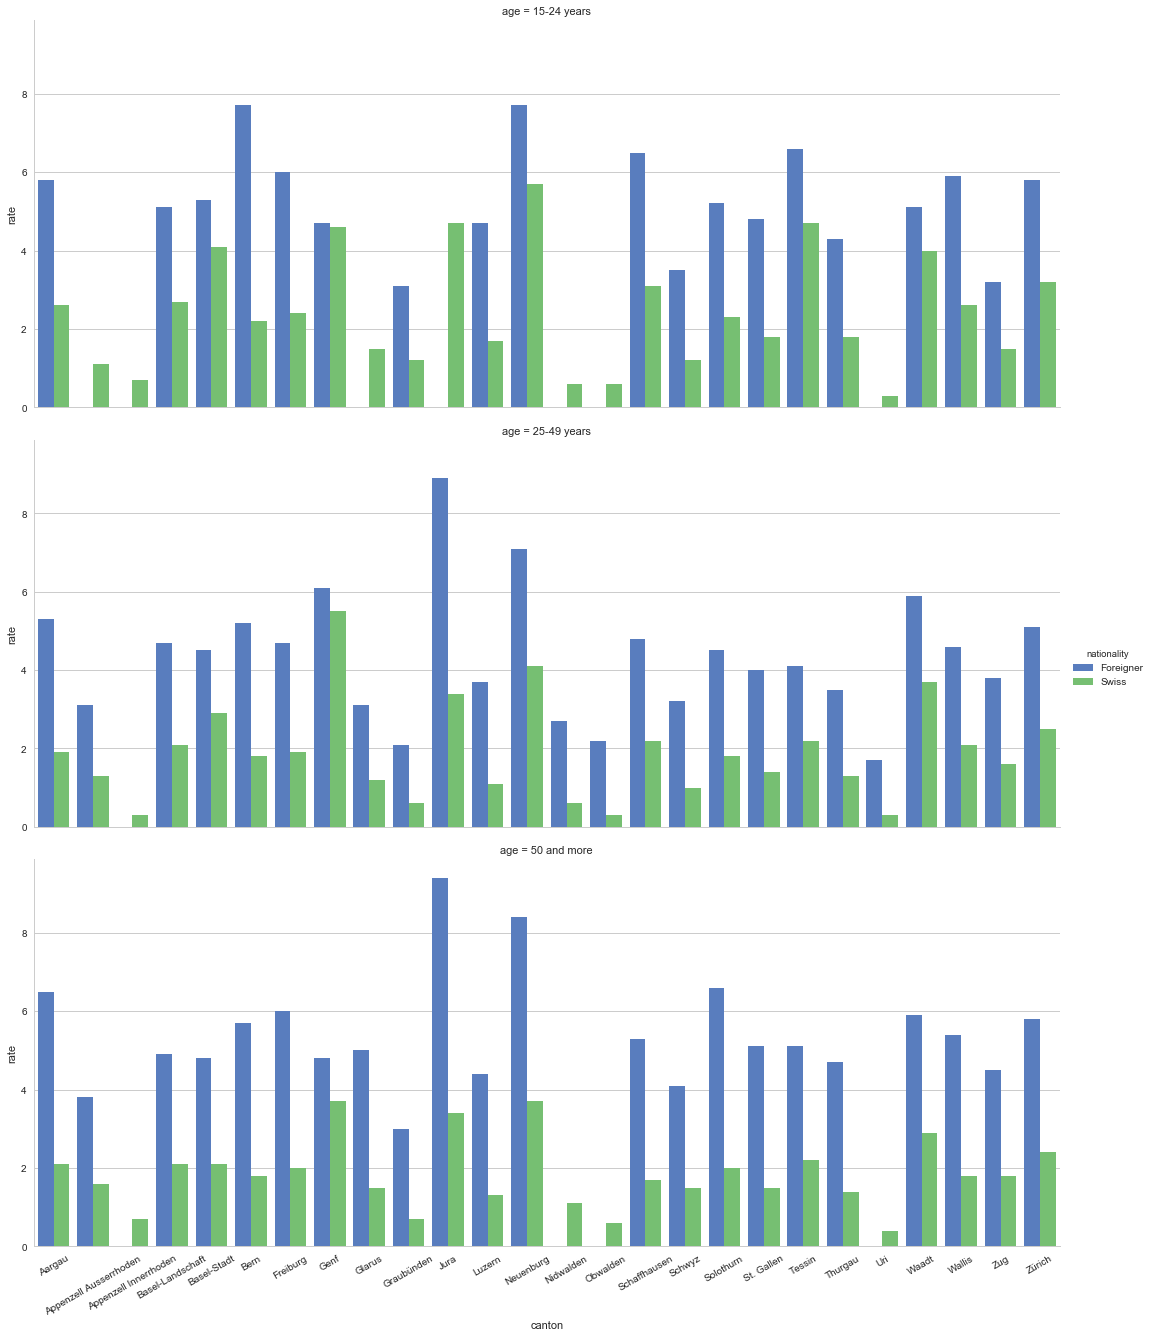

In [83]:
sns.set(style="whitegrid")
g = sns.factorplot(x="canton", y="rate", hue="nationality", row='age',
                   data=ch_stat_comp.sort_values('canton'), size=6, kind="bar", palette="muted", aspect=2.5)
g.set_xticklabels(rotation=30)

## 2.4 Röstigraben


In [84]:
ch_stat.set_index('canton', inplace=True)

In [85]:
canton_french =  ['Freiburg', 'Genf', 'Jura', 'Neuenburg', 'Waadt', 'Wallis']
canton_italian =  ['Tessin']

ch_stat['language'] = 'German'
ch_stat.loc[canton_french, 'language'] = 'French'
ch_stat.loc[canton_italian, 'language'] = 'Italian'

ch_stat[['unemp_number', 'canton_active_pop', 'language']].head()

,unemp_number,canton_active_pop,language
canton,,,
Aargau,10684,368413.793103,German
Appenzell Ausserrhoden,523,30764.705882,German
Appenzell Innerrhoden,62,8857.142857,German
Basel-Landschaft,4082,145785.714286,German
Basel-Stadt,3455,98714.285714,German


In [86]:
roestigraben = 100*ch_stat.groupby('language').unemp_number.sum()/ch_stat.groupby('language').canton_active_pop.sum()
print('German speaking part: {:.2f}%\nFrench speaking part: {:.2f}%'.format(
    roestigraben['German'], roestigraben['French']))

German speaking part: 2.56%
French speaking part: 4.09%
